In [15]:
import sys
sys.path.append('../../')
from example.Ward_and_Hohmann_1988.circularloop import calc_cl_freq, calc_cl_time

import numpy as np
import matplotlib.pyplot as plt

In [16]:
def pos(data):
    """Return positive data; set negative data to NaN."""
    return np.array([x if x > 0 else np.nan for x in data])


def neg(data):
    """Return -negative data; set positive data to NaN."""
    return np.array([-x if x < 0 else np.nan for x in data])


def calc_rel_err(ans_ana, ans_num):
    rel_err = np.abs((ans_num - ans_ana) / ans_ana) * 100
    return rel_err

# 検証条件

In [17]:
emsrc_name = 'CircularLoop'
rho = 50
res = 100

hankel_filter = ['anderson801', 'kong241', 'mizunaga90', 'werthmuller201', 'key201']

# 周波数領域

In [18]:
freq = np.logspace(-1, np.log10(250000), 301)
filter_name = hankel_filter[3]
[fhz_emu, fhz_emp, fhz_ana], freq = calc_cl_freq(freq, filter_name=filter_name)

# 相対誤差
rel_err_emp_re = calc_rel_err(fhz_ana.real, fhz_emp.real)
rel_err_emp_im = calc_rel_err(fhz_ana.imag, fhz_emp.imag)
rel_err_emu_re = calc_rel_err(fhz_ana.real, fhz_emu.real)
rel_err_emu_im = calc_rel_err(fhz_ana.imag, fhz_emu.imag)

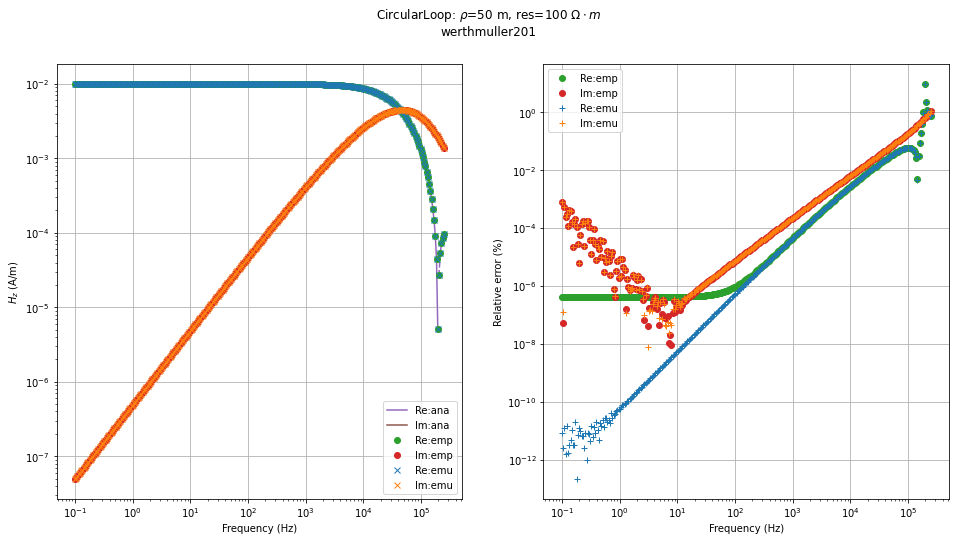

In [19]:
fig, ax = plt.subplots(1,2,figsize=(16, 8))
plt.suptitle(fr'{emsrc_name}: $\rho$={rho} m, res={res} $\Omega \cdot m$' + '\n' f'{filter_name}')

ax[0].plot(freq, pos(fhz_ana.real), 'C4-', label='Re:ana')
ax[0].plot(freq, neg(fhz_ana.real), 'C4--')
ax[0].plot(freq, pos(fhz_ana.imag), 'C5-', label='Im:ana')
ax[0].plot(freq, neg(fhz_ana.imag), 'C5--')

ax[0].plot(freq, pos(fhz_emp.real), 'C2o', label='Re:emp')
ax[0].plot(freq, neg(fhz_emp.real), 'C2o')
ax[0].plot(freq, pos(fhz_emp.imag), 'C3o', label='Im:emp')
ax[0].plot(freq, neg(fhz_emp.imag), 'C3o')

ax[0].plot(freq, pos(fhz_emu.real), 'C0x', label='Re:emu')
ax[0].plot(freq, neg(fhz_emu.real), 'C0x')
ax[0].plot(freq, pos(fhz_emu.imag), 'C1x', label='Im:emu')
ax[0].plot(freq, neg(fhz_emu.imag), 'C1x')

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel(r'$H_z$ (A/m)')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(freq, rel_err_emp_re, 'C2o',label='Re:emp')
ax[1].plot(freq, rel_err_emp_im, 'C3o',label='Im:emp')
ax[1].plot(freq, rel_err_emu_re, 'C0+',label='Re:emu')
ax[1].plot(freq, rel_err_emu_im, 'C1+',label='Im:emu')

ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Relative error (%)')
ax[1].grid(True)
ax[1].legend()


plt.show()

# 時間領域

In [20]:
time = np.logspace(-8, 0, 301)
filter_name = hankel_filter[3]
[thz_emu, thz_emp, thz_ana], time_thz, [thzdt_emu, thzdt_emp, thzdt_ana], time_thzdt = calc_cl_time(time, filter_name)

# 相対誤差
rel_err_emp_thz = calc_rel_err(thz_ana, thz_emp)
rel_err_emp_thzdt = calc_rel_err(thzdt_ana, thzdt_emp)
rel_err_emu_thz = calc_rel_err(thz_ana, thz_emu)
rel_err_emu_thzdt = calc_rel_err(thzdt_ana, thzdt_emu)

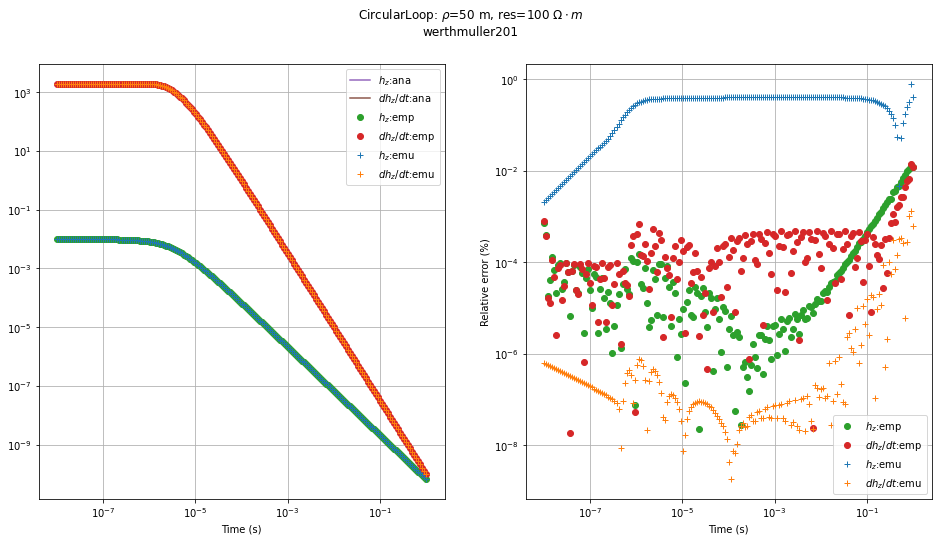

In [21]:
fig, ax = plt.subplots(1,2,figsize=(16, 8))
plt.suptitle(fr'{emsrc_name}: $\rho$={rho} m, res={res} $\Omega \cdot m$' + '\n' f'{filter_name}')

ax[0].plot(time_thz, pos(thz_ana), 'C4-', label=r'$h_z$:ana')
ax[0].plot(time_thz, neg(thz_ana), 'C4--')
ax[0].plot(time_thzdt, pos(thzdt_ana), 'C5-', label=r'$dh_z/dt$:ana')
ax[0].plot(time_thzdt, neg(thzdt_ana), 'C5--')

ax[0].plot(time_thz, pos(thz_emp), 'C2o', label=r'$h_z$:emp')
ax[0].plot(time_thz, neg(thz_emp), 'C2o')
ax[0].plot(time_thzdt, pos(thzdt_emp), 'C3o', label=r'$dh_z/dt$:emp')
ax[0].plot(time_thzdt, neg(thzdt_emp), 'C3o')

ax[0].plot(time_thz, pos(thz_emu), 'C0+', label=r'$h_z$:emu')
ax[0].plot(time_thz, neg(thz_emu), 'C0+')
ax[0].plot(time_thzdt, pos(thzdt_emu), 'C1+', label=r'$dh_z/dt$:emu')
ax[0].plot(time_thzdt, neg(thzdt_emu), 'C1+')

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('Time (s)')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(time_thz, rel_err_emp_thz, 'C2o',label=r'$h_z$:emp')
ax[1].plot(time_thzdt, rel_err_emp_thzdt, 'C3o',label=r'$dh_z/dt$:emp')
ax[1].plot(time_thz, rel_err_emu_thz, 'C0+',label=r'$h_z$:emu')
ax[1].plot(time_thzdt, rel_err_emu_thzdt, 'C1+',label=r'$dh_z/dt$:emu')

ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Relative error (%)')
ax[1].grid(True)
ax[1].legend()

plt.show()